In [1]:
import os
import pickle
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from IPython.display import Image, display

detector = MTCNN()

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


GENKI4K dataset preparation

In [ ]:
SMILE_FOLDER = '../datasets/genki4k/'
F_SMILE_FOLDER = './data/smile_data/'
NUM_SMILE_IMAGE = 4000
SMILE_SIZE = 48

X = []
with open(SMILE_FOLDER + "labels.txt") as f:
    for i in range(NUM_SMILE_IMAGE):
        fileName = SMILE_FOLDER + "files/file" + str("%04d" % (1+i,)) + ".jpg"
#             print(fileName)
        img = cv2.imread(fileName)
        result = detector.detect_faces(img)
        if not result:
            continue
        face_position = result[0].get('box')
        x = face_position[0]
        y = face_position[1]
        w = face_position[2]
        h = face_position[3]
        img = img[y:y+h, x:x+w]
        if(img.size==0):
            continue;
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (48, 48))
        T = np.zeros([SMILE_SIZE, SMILE_SIZE, 1])
        T[:, :, 0] = img
        l = f.readline()
        label = (int)(l.split()[0])
        X.append((T, label))
for _ in range(10):
    np.random.shuffle(X)

train_data, test_data = X[:3000], X[3000:]

np.save(F_SMILE_FOLDER + 'train.npy', train_data)
np.save(F_SMILE_FOLDER + 'test.npy', test_data)

IMDB-WIKI dataset preparation

In [3]:
F_AGE_FOLDER = './data/age_data_101/'
F_GENDER_FOLDER = './data/gender_data_101/'

f = open(os.path.expanduser("~")+'/coding/cnn/multi-task-learning/pkl_folder/imdb-gender-age101.pkl', 'rb')
imdbAgeGender = pickle.load(f)
age = imdbAgeGender['age']
gender = imdbAgeGender['gender']
imgs = imdbAgeGender['imgs']
f.close()
n = len(gender)

X_age = []
X_gender = []

In [4]:
for i in range(n):
    if i%10000==0:
        print("i: {}".format(i))
#         fileName = IMDB_FOLDER + str(i) + '.jpg'
    img = cv2.imread(imgs[i])
    result = detector.detect_faces(img)
    if not result:
        continue
    face_position = result[0].get('box')
    x = face_position[0]
    y = face_position[1]
    w = face_position[2]
    h = face_position[3]
    img = img[y:y+h, x:x+w]
    if(img.size==0):
        continue;
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(48, 48))

    T = np.zeros([48, 48, 1])
    T[:, :, 0] = img

    label_age = age[i]
    label_gender = gender[i]
    X_age.append((T, label_age))
    X_gender.append((T, label_gender))

i: 0
i: 10000
i: 20000
i: 30000
i: 40000
i: 50000
i: 60000
i: 70000
i: 80000
i: 90000
i: 100000
i: 110000
i: 120000
i: 130000
i: 140000
i: 150000
i: 160000
i: 170000
i: 180000
i: 190000


In [5]:
for _ in range(10):
    np.random.shuffle(X_age)
    np.random.shuffle(X_gender)

In [ ]:
train_data_age, test_data_age = X_age[:90000], X_age[90000:]
train_data_gender, test_data_gender = X_gender[:90000], X_gender[90000:]

np.save(F_AGE_FOLDER + 'train.npy', train_data_age)
np.save(F_AGE_FOLDER + 'data.npy', X_age)
np.save(F_AGE_FOLDER + 'test.npy', test_data_age)

np.save(F_GENDER_FOLDER + 'train.npy', train_data_gender)
np.save(F_GENDER_FOLDER + 'data.npy', X_gender)
np.save(F_GENDER_FOLDER + 'test.npy', test_data_gender)

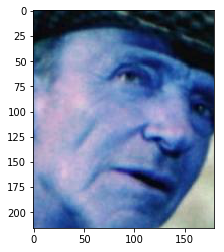

Age: 69
Gender: 1.0


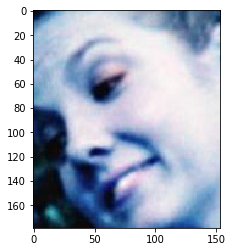

Age: 69
Gender: 1.0


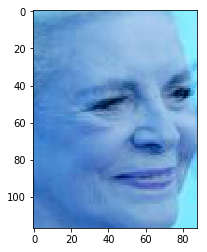

Age: 80
Gender: 0.0


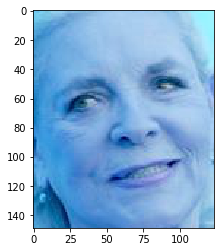

Age: 80
Gender: 0.0


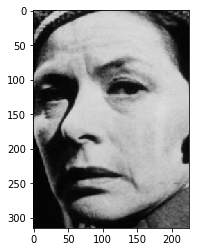

Age: 50
Gender: 0.0


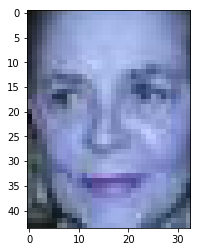

Age: 83
Gender: 0.0


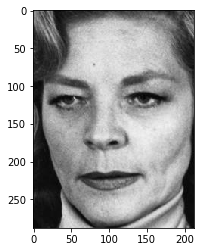

Age: 50
Gender: 0.0


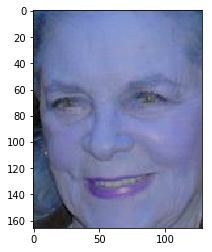

Age: 82
Gender: 0.0


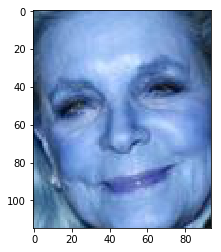

Age: 82
Gender: 0.0


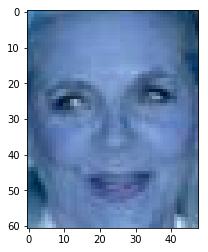

Age: 80
Gender: 0.0


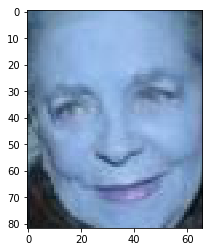

Age: 83
Gender: 0.0


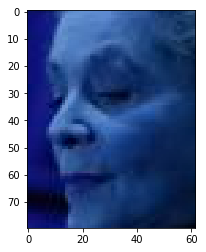

Age: 83
Gender: 0.0


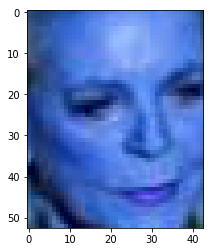

Age: 82
Gender: 0.0


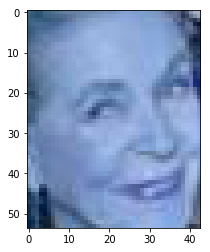

Age: 82
Gender: 0.0


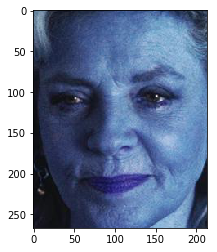

Age: 66
Gender: 0.0


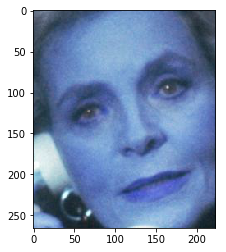

Age: 67
Gender: 0.0


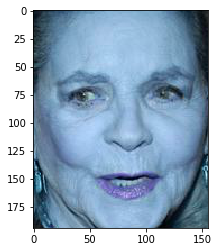

Age: 82
Gender: 0.0


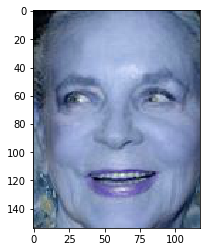

Age: 81
Gender: 0.0


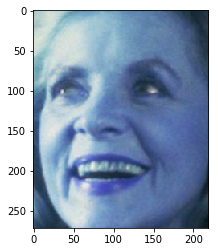

Age: 67
Gender: 0.0


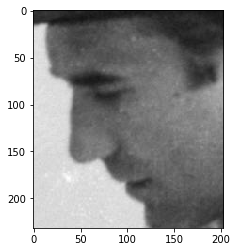

Age: 29
Gender: 0.0


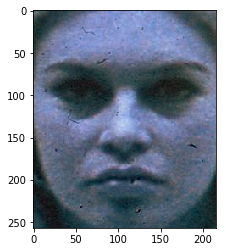

Age: 29
Gender: 0.0


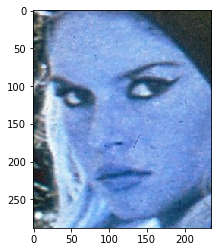

Age: 29
Gender: 0.0


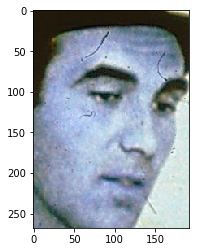

Age: 29
Gender: 0.0


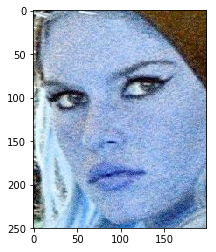

Age: 29
Gender: 0.0


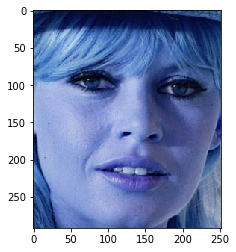

Age: 31
Gender: 0.0


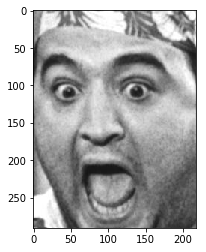

Age: 29
Gender: 1.0


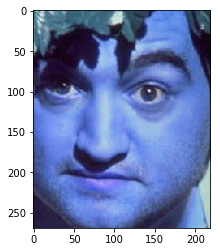

Age: 29
Gender: 1.0


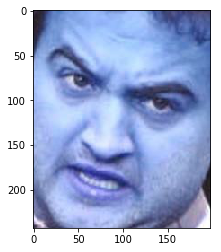

Age: 29
Gender: 1.0


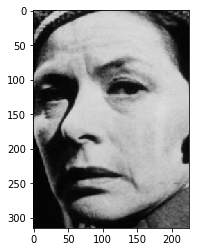

Age: 59
Gender: 0.0


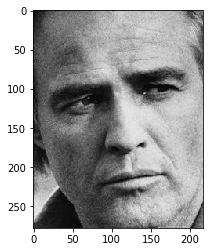

Age: 48
Gender: 1.0


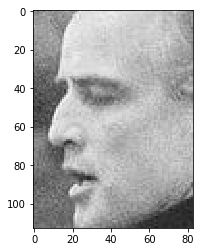

Age: 48
Gender: 1.0


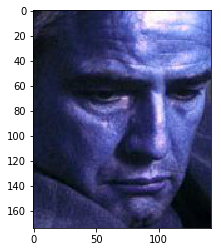

Age: 48
Gender: 1.0


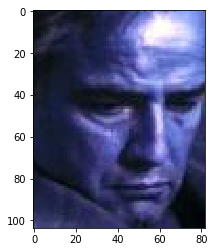

Age: 48
Gender: 1.0


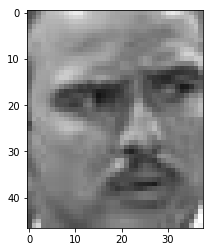

Age: 39
Gender: 1.0


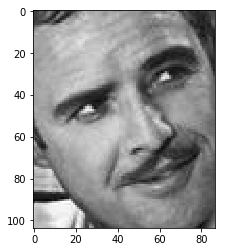

Age: 39
Gender: 1.0


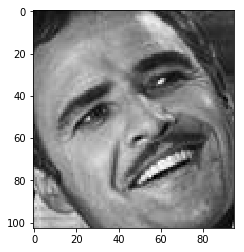

Age: 39
Gender: 1.0


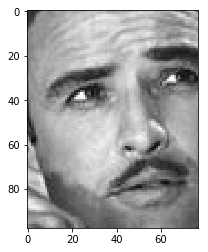

Age: 39
Gender: 1.0


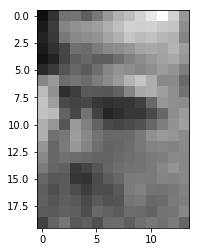

Age: 39
Gender: 1.0


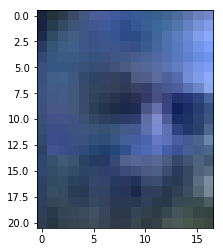

Age: 77
Gender: 1.0


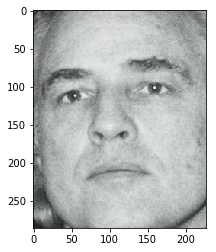

Age: 86
Gender: 1.0


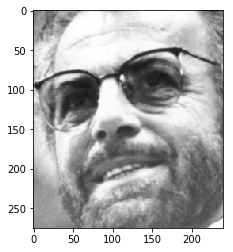

Age: 66
Gender: 1.0


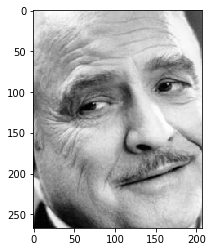

Age: 66
Gender: 1.0


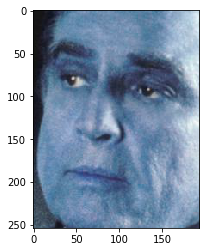

Age: 70
Gender: 1.0


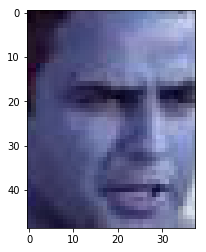

Age: 40
Gender: 1.0


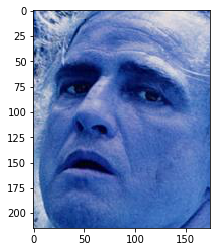

Age: 52
Gender: 1.0


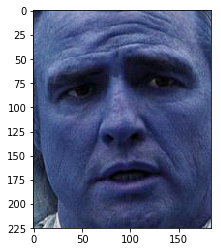

Age: 52
Gender: 1.0


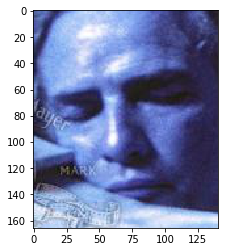

Age: 52
Gender: 1.0


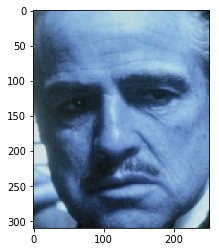

Age: 48
Gender: 1.0


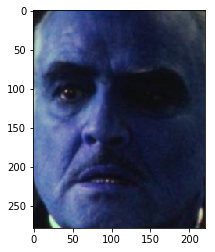

Age: 66
Gender: 1.0


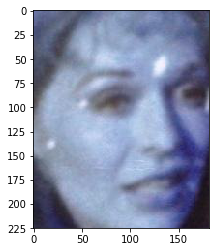

Age: 54
Gender: 1.0


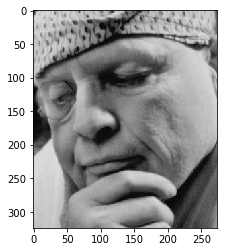

Age: 72
Gender: 1.0


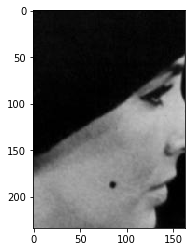

Age: 38
Gender: 1.0


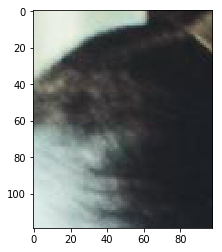

Age: 38
Gender: 1.0


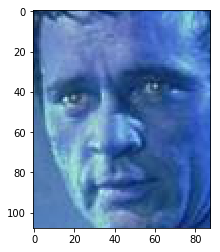

Age: 38
Gender: 1.0


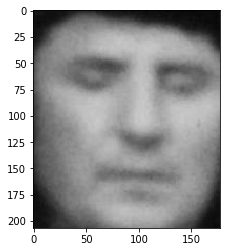

Age: 44
Gender: 1.0


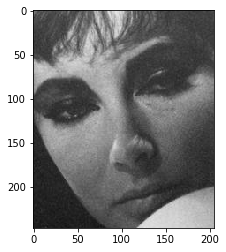

Age: 38
Gender: 1.0


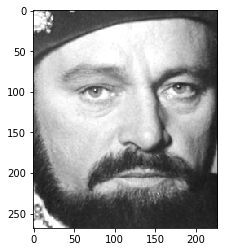

Age: 44
Gender: 1.0


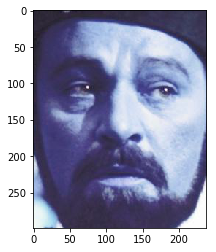

Age: 44
Gender: 1.0


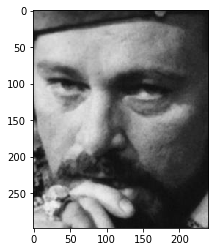

Age: 44
Gender: 1.0


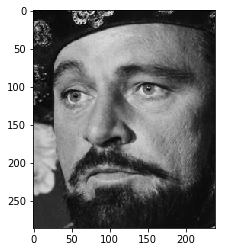

Age: 44
Gender: 1.0


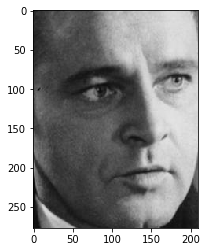

Age: 38
Gender: 1.0


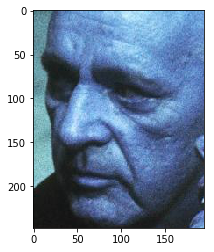

Age: 59
Gender: 1.0


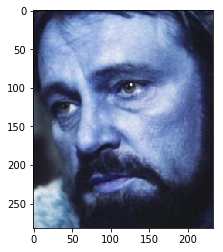

Age: 44
Gender: 1.0


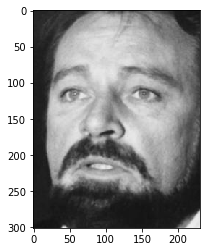

Age: 44
Gender: 1.0


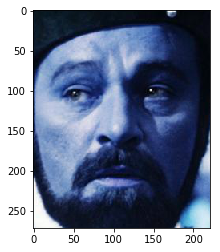

Age: 44
Gender: 1.0


In [6]:
for i in range(100):
    img = cv2.imread(imgs[i])
    result = detector.detect_faces(img)
    if not result:
        continue
    face_position = result[0].get('box')
    x = face_position[0]
    y = face_position[1]
    w = face_position[2]
    h = face_position[3]
    img = img[y:y+h, x:x+w]
    if(img.size==0):
        continue;
    plt.imshow(img)
    plt.show()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(48, 48))

    print("Age: "+ str(age[i]))
    print("Gender: "+ str(gender[i]))